<h1>linux文本处理三剑客之awk<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#awk" data-toc-modified-id="awk-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>awk</a></span><ul class="toc-item"><li><span><a href="#命令格式" data-toc-modified-id="命令格式-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>命令格式</a></span></li><li><span><a href="#详细使用" data-toc-modified-id="详细使用-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>详细使用</a></span><ul class="toc-item"><li><span><a href="#指定分隔符" data-toc-modified-id="指定分隔符-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>指定分隔符</a></span></li><li><span><a href="#从文件中读取程序" data-toc-modified-id="从文件中读取程序-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>从文件中读取程序</a></span></li><li><span><a href="#设置变量" data-toc-modified-id="设置变量-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>设置变量</a></span></li><li><span><a href="#内建变量" data-toc-modified-id="内建变量-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>内建变量</a></span><ul class="toc-item"><li><span><a href="#数据字段变量" data-toc-modified-id="数据字段变量-1.2.4.1"><span class="toc-item-num">1.2.4.1&nbsp;&nbsp;</span>数据字段变量</a></span></li><li><span><a href="#其他参数" data-toc-modified-id="其他参数-1.2.4.2"><span class="toc-item-num">1.2.4.2&nbsp;&nbsp;</span>其他参数</a></span></li></ul></li><li><span><a href="#多个命令" data-toc-modified-id="多个命令-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>多个命令</a></span></li><li><span><a href="#BEGIN关键字与END关键字" data-toc-modified-id="BEGIN关键字与END关键字-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>BEGIN关键字与END关键字</a></span></li><li><span><a href="#printf指定输出格式" data-toc-modified-id="printf指定输出格式-1.2.7"><span class="toc-item-num">1.2.7&nbsp;&nbsp;</span>printf指定输出格式</a></span></li><li><span><a href="#操作符" data-toc-modified-id="操作符-1.2.8"><span class="toc-item-num">1.2.8&nbsp;&nbsp;</span>操作符</a></span></li><li><span><a href="#分支语句" data-toc-modified-id="分支语句-1.2.9"><span class="toc-item-num">1.2.9&nbsp;&nbsp;</span>分支语句</a></span></li><li><span><a href="#循环语句" data-toc-modified-id="循环语句-1.2.10"><span class="toc-item-num">1.2.10&nbsp;&nbsp;</span>循环语句</a></span></li><li><span><a href="#数组" data-toc-modified-id="数组-1.2.11"><span class="toc-item-num">1.2.11&nbsp;&nbsp;</span>数组</a></span></li><li><span><a href="#函数" data-toc-modified-id="函数-1.2.12"><span class="toc-item-num">1.2.12&nbsp;&nbsp;</span>函数</a></span><ul class="toc-item"><li><span><a href="#自定义函数" data-toc-modified-id="自定义函数-1.2.12.1"><span class="toc-item-num">1.2.12.1&nbsp;&nbsp;</span>自定义函数</a></span></li><li><span><a href="#内置函数" data-toc-modified-id="内置函数-1.2.12.2"><span class="toc-item-num">1.2.12.2&nbsp;&nbsp;</span>内置函数</a></span></li></ul></li></ul></li><li><span><a href="#实例列举" data-toc-modified-id="实例列举-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>实例列举</a></span></li></ul></li></ul></div>

In [21]:
#查看系统环境
!lsb_release -a

No LSB modules are available.
Distributor ID:	LinuxMint
Description:	Linux Mint 19.3 Tricia
Release:	19.3
Codename:	tricia


In [22]:
#查看文本内容
!cat awk.text

1 M.Tansley     05/99     48311     Green     8     40     44
2 J.Lulu     06/99     48317     green     9     24     26
3 P.Bunny,02/99,48,Yellow,12,35,28
4 J.Troll:07/99:4842:Brown-3:12:26:26
5 L.Tansley:05/99:4712:Brown-2:12:30:28


## awk

注意：jupyter运行linux指令需要在指令前加`!`

### 命令格式

**awk 命令的基本格式为：**
```bash
awk 'BEGIN{ 命令1 } 模式{ 命令2 } END{ 命令3 }' 文件
```

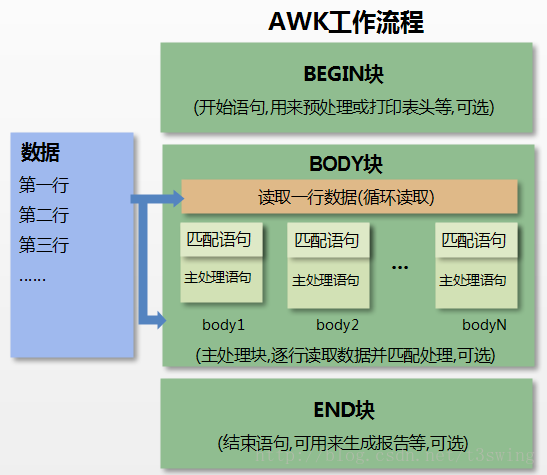

- 1、BEGIN 执行 BEGIN 块的内容，即`命令1`内容,可选。
- 2、完成 BEGIN 块的执行，开始执行body块。
- 3、读入有 \n 换行符分割的记录。
- 4、将记录按指定的域分隔符划分域，填充域。
- 5、依次执行各 BODY 块，pattern 部分匹配该行内容成功后，才会执行`命令2`的内容。
- 6、循环读取并执行各行直到文件结束，完成body块执行。
- 7、开始 END 块执行，`命令3`内容，END 块可以输出最终结果,可选。

**选用参数**

选项	|含义
-|-
-F fs	|指定以 fs 作为输入行的分隔符，awk 命令默认分隔符为空格或制表符。|
-f file	|从脚本文件中读取 awk 脚本指令，以取代直接在命令行中输入指令。|
-v var=val	|在执行处理过程之前，设置一个变量 var，并给其设备初始值为 val。|

**awk 命令的脚本命令：**
```bash
'匹配规则{执行命令}'
```

>1.匹配规则：可以使用字符串（比如 /demo/，表示查看含有 demo 字符串的行）或者正则表达式指定
>
>2.执行命令：需要用大括号（{}）括起来

注意：
- 整个脚本命令是用单引号（''）括起
- 在 awk 程序执行时，如果没有指定执行命令，则默认会把匹配的行输出；如果不指定匹配规则，则默认匹配文本中所有的行。

**awk 命令的运行方式：**

- 1.awk命令行: #awk
- 2.awk程序文件: #awk -f  /data/awk_script//将swk命令写到文件中，然后调用这个文件
- 3.awk脚本: #!/bin/awk -f

### 详细使用

#### 指定分隔符

In [65]:
!awk -F: '{print $1}' awk.text
print('--------------------------------------------------------------')   
!awk -F: '{print $1}' awk.text

1 M.Tansley     05/99     48311     Green     8     40     44
2 J.Lulu     06/99     48317     green     9     24     26
3 P.Bunny,02/99,48,Yellow,12,35,28
4 J.Troll
5 L.Tansley
--------------------------------------------------------------
1 M.Tansley     05/99     48311     Green     8     40     44
2 J.Lulu     06/99     48317     green     9     24     26
3 P.Bunny,02/99,48,Yellow,12,35,28
4 J.Troll
5 L.Tansley


#### 从文件中读取程序

跟 sed 一样，awk 允许将脚本命令存储到文件中，然后再在命令行中引用

In [13]:
!cat awk.sh

{print  "The fifth number after"  $1  "is"   $6}


In [14]:
!awk -f awk.sh test

The fifth number after1is8
The fifth number after2is9
The fifth number after3is
The fifth number after4is
The fifth number after5is


In [25]:
!cat awk.func

#!/bin/awk -f
#运行前
BEGIN {
    math = 0
    english = 0
    computer = 0
 
    printf "NAME    NO.   MATH  ENGLISH  COMPUTER   TOTAL\n"
    printf "---------------------------------------------\n"
}
#运行中
{
    math+=$3
    english+=$4
    computer+=$5
    printf "%-6s %-6s %4d %8d %8d %8d\n", $1, $2, $3,$4,$5, $3+$4+$5
}
#运行后
END {
    printf "---------------------------------------------\n"
    printf "  TOTAL:%10d %8d %8d \n", math, english, computer
    printf "AVERAGE:%10.2f %8.2f %8.2f\n", math/NR, english/NR, computer/NR
}


In [28]:
!awk -f awk.func score

NAME    NO.   MATH  ENGLISH  COMPUTER   TOTAL
---------------------------------------------
Marry  2143     78       84       77      239
Jack   2321     66       78       45      189
Tom    2122     48       77       71      196
Mike   2537     87       97       95      279
Bob    2415     40       57       62      159
---------------------------------------------
  TOTAL:       319      393      350 
AVERAGE:     63.80    78.60    70.00


#### 设置变量

In [20]:
!awk -v a=1 '{print NR,$2,$2+a}' awk.text

1 M.Tansley 1
2 J.Lulu 1
3 P.Bunny,02/99,48,Yellow,12,35,28 1
4 J.Troll:07/99:4842:Brown-3:12:26:26 1
5 L.Tansley:05/99:4712:Brown-2:12:30:28 1


#### 内建变量

序号 | 变量 | 描述
:-: | :-: | :-
1 | \$n | 当前记录的第n个字段，字段间由FS分隔
2 | \$0 | 完整的输入记录
3 | ARGC | 命令行参数的数目
4 | ARGIND | 命令行中当前文件的位置(从0开始算)
5 | ARGV | 包含命令行参数的数组
6 | CONVFMT | 数字转换格式(默认值为%.6g)ENVIRON环境变量关联数组
7 | ERRNO | 最后一个系统错误的描述
8 | FIELDWIDTHS | 字段宽度列表(用空格键分隔)
9 | FILENAME | 当前文件名
10 | FNR | 各文件分别计数的行号
11 | FS | 字段分隔符(默认是任何空格)
12 | IGNORECASE | 如果为真，则进行忽略大小写的匹配
13 | NF | 一条记录的字段的数目
14 | NR | 已经读出的记录数，就是行号，从1开始
15 | OFMT | 数字的输出格式(默认值是%.6g)
16 | OFS | 输出记录分隔符（输出换行符），输出时用指定的符号代替换行符
17 | ORS | 输出记录分隔符(默认值是一个换行符)
18 | RLENGTH | 由match函数所匹配的字符串的长度
19 | RS | 记录分隔符(默认是一个换行符)
20 | RSTART | 由match函数所匹配的字符串的第一个位置
21 | SUBSEP | 数组下标分隔符(默认值是/034)

##### 数据字段变量

awk 会自动给`一行`中的每个数据元素分配一个变量

变量|含义
-|:-
\$0| 代表整个文本行；|
\$1| 代表文本行中的第 1 个数据字段；|
\$2| 代表文本行中的第 2 个数据字段；|
\$n| 代表文本行中的第 n 个数据字段。|

注意：在 awk 中，默认的字段分隔符是任意的空白字符（例如空格或制表符），awk 在读取一行文本时，会用预定义的字段分隔符划分每个数据字段

In [4]:
# 查看全部
!awk '{print $0}' awk.text
print('--------------------------------------------------------')
# 查看每一行的第一个内容
!awk '{print $1}' awk.text
print('--------------------------------------------------------')
# 查看每一行的最后一个内容
!awk '{print $6}' awk.text

M.Tansley     05/99     48311     Green     8     40     44
J.Lulu     06/99     48317     green     9     24     26
P.Bunny     02/99     48     Yellow     12     35     28
J.Troll     07/99     4842     Brown-3     12     26     26
L.Tansley     05/99     4712     Brown-2     12     30     28
--------------------------------------------------------
M.Tansley
J.Lulu
P.Bunny
J.Troll
L.Tansley
--------------------------------------------------------
40
24
35
26
30


##### 其他参数

In [24]:
!awk 'BEGIN{printf "%4s %4s %4s %4s %4s %4s %4s %4s %4s\n","FILENAME","ARGC","FNR","FS","NF","NR","OFS","ORS","RS";printf "---------------------------------------------\n"} {printf "%4s %4s %4s %4s %4s %4s %4s %4s %4s\n",FILENAME,ARGC,FNR,FS,NF,NR,OFS,ORS,RS}' awk.text

FILENAME ARGC  FNR   FS   NF   NR  OFS  ORS   RS
---------------------------------------------
test    2    1         8    1         
    

test    2    2         8    2         
    

test    2    3         2    3         
    

test    2    4         2    4         
    

test    2    5         2    5         
    



In [23]:
!awk -v FS=':''{print $1,FS,$3}'   awk.text

^C


#### 多个命令

awk 允许将多条命令组合成一个正常的程序。要在命令行上的程序脚本中使用多条命令，只要在命令之间放个`分号`即可

In [5]:
!echo "My name is Tom" | awk '{$4="ann";print $0}'

My name is ann


#### BEGIN关键字与END关键字

In [54]:
!awk 'BEGIN { for (i = 1; i <= 5; ++i) print i }'

1
2
3
4
5


#### printf指定输出格式

printf "FORMAT" ,item1,item2,…//指格式化输出，必须指定FORMAT，不会自动换行，换行使用换行符\n;FORMAT中需要为每个item指定格式符:与item--对应

%c: 显示字符的ASCII码

%d, %i: 显示十进制整数

%e, %E:显示科学计数法数值

%f：显示为浮点数

%g, %G：以科学计数法或浮点形式显示数值

%s：显示字符串

%u：无符号整数

%%: 显示%自身

修饰符：

#[.#]：第一个数字控制显示的宽度；第二个#表示小数点后精度，%3.1f

-: 左对齐（默认右对齐） %-15s

+：显示数值的正负符号 %+d

In [63]:
!awk 'BEGIN {printf "%s %s %-4.2f\n","TOM","man",66.1234}'
!awk 'BEGIN {printf "%-10s %-8s %-4.2f\n","TOM","man",66.1234}'

TOM man 66.12
TOM        man      66.12


#### 操作符

- 算数操作符 ： x+y, x-y,x*y, x/y, x^y, x%y；-x: 转换为负数 ；+x: 转换为数值
- 赋值操作符 ： =, +=, -=, *=, /=, %=, ^=   ++, --
- 比较操作符：==, !=, >, >=, <, <=
- 模式匹配符：\~：左边是否和右边匹配包含 !\~：是否不匹配
- 逻辑操作符:与&&，或||，非!
- 条件表达式（三目表达式）：

In [56]:
!echo "1.7 2.52" | awk '{printf ("%2f\n",$1)}'
!echo "1.7 2.52" | awk '{printf ("%d\n",$2)}'

1.700000
2


#### 分支语句

In [50]:
!awk 'BEGIN {num = 10; if (num % 2 == 0) printf "%d 是偶数\n", num }'
!awk 'BEGIN {num = 11; if (num % 2 == 0) printf "%d 是偶数\n", num; else printf "%d 是奇数\n", num }'

10 是偶数
11 是奇数


#### 循环语句

In [12]:
print('For----------------------------------------------')
!awk 'BEGIN { for (i = 1; i <= 5; ++i) print i }'
print('While----------------------------------------------')
!awk 'BEGIN {i = 1; while (i < 6) { print i; ++i } }'
print('Break----------------------------------------------')
!awk 'BEGIN {sum = 0; for (i = 0; i < 20; ++i) {sum += i; if (sum > 50) break; else print "Sum =", sum }}'
print('Continue----------------------------------------------')
!awk 'BEGIN {for (i = 1; i <= 20; ++i) {if (i % 2 == 0) print i; else continue;}}'
print('Exit----------------------------------------------')
!awk 'BEGIN {sum = 0; for (i = 0; i < 20; ++i) {sum += i; if (sum > 50) exit(10); else print "Sum =", sum }}'

For----------------------------------------------
1
2
3
4
5
While----------------------------------------------
1
2
3
4
5
Break----------------------------------------------
Sum = 0
Sum = 1
Sum = 3
Sum = 6
Sum = 10
Sum = 15
Sum = 21
Sum = 28
Sum = 36
Sum = 45
Continue----------------------------------------------
2
4
6
8
10
12
14
16
18
20
Exit----------------------------------------------
Sum = 0
Sum = 1
Sum = 3
Sum = 6
Sum = 10
Sum = 15
Sum = 21
Sum = 28
Sum = 36
Sum = 45


#### 数组

**语法格式:**
```bash
array_name[index]=value
```

In [4]:
!awk 'BEGIN {sites["runoob"]="www.runoob.com";sites["google"]="www.google.com";print sites["runoob"] "\n" sites["google"]}'

www.runoob.com
www.google.com


#### 函数

#####  自定义函数

**语法格式:**
```bash
function function_name(argument1, argument2, ...)
{
    function body
}
```

注意：
- 1.function_name 是用户自定义函数的名称。函数名称应该以字母开头，其后可以是数字、字母或下划线的自由组合。AWK 保留的关键字不能作为用户自定义函数的名称。 
- 2.自定义函数可以接受多个输入参数，这些参数之间通过逗号分隔。参数并不是必须的。我们也可以定义没有任何输入参数的函数。 
- 3.function body 是函数体部分，它包含 AWK 程序代码。 

In [13]:
!cat awk.func2

# 返回最小值
function find_min(num1, num2)
{
  if (num1 < num2)
    return num1
  return num2
}

# 返回最大值
function find_max(num1, num2)
{
  if (num1 > num2)
    return num1
  return num2
}

# 主函数
function main(num1, num2)
{
  # 查找最小值
  result = find_min(10, 20)
  print "Minimum =", result

  # 查找最大值
  result = find_max(10, 20)
  print "Maximum =", result
}

# 脚本从这里开始执行
BEGIN {
  main(10, 20)
}  


In [22]:
!awk -f \
function.awk 

Minimum = 10
Maximum = 20


##### 内置函数

In [37]:
!awk 'BEGIN {param = 5; result = exp(param); printf "The exponential value of %f is %f.\n", param, result;}'
print('------------------------------------------')
!awk 'BEGIN {str = "Hello, World";print "String before replacement = " str;sub("World", "Jerry", str);print "String after replacement = " str}'
print('------------------------------------------')
!awk 'BEGIN{info="this is a test2012test!";print index(info,"11111")?"ok":"no found";}'

The exponential value of 5.000000 is 148.413159.
------------------------------------------
String before replacement = Hello, World
String after replacement = Hello, Jerry
------------------------------------------
no found


### 实例列举

In [64]:
#从文件中找出长度大于10的行
!awk 'length>38' awk.text

1 M.Tansley     05/99     48311     Green     8     40     44
2 J.Lulu     06/99     48317     green     9     24     26
5 L.Tansley:05/99:4712:Brown-2:12:30:28


In [45]:
#打印Hello world
!awk 'BEGIN { print "Hello, world!" }'

Hello, world!


In [31]:
#9*9乘法表
!seq 9 | sed 'H;g' | awk -v RS='' '{for(i=1;i<=NF;i++)printf("%dx%d=%d%s", i, NR, i*NR, i==NR?"\n":"\t")}'

1x1=1
1x2=2	2x2=4
1x3=3	2x3=6	3x3=9
1x4=4	2x4=8	3x4=12	4x4=16
1x5=5	2x5=10	3x5=15	4x5=20	5x5=25
1x6=6	2x6=12	3x6=18	4x6=24	5x6=30	6x6=36
1x7=7	2x7=14	3x7=21	4x7=28	5x7=35	6x7=42	7x7=49
1x8=8	2x8=16	3x8=24	4x8=32	5x8=40	6x8=48	7x8=56	8x8=64
1x9=9	2x9=18	3x9=27	4x9=36	5x9=45	6x9=54	7x9=63	8x9=72	9x9=81
